## Uppgift 1 a)
Ev. kommentar:

In [12]:
import math

# Hjälpmetod för att beräkan basen på en kon
def areaKon(r):
    # Beräkna basarean på godtycklig radie och returnera den
    return math.pi * r * r


# Hjälpmetod för att beräkna volumen för en kon
def volymKon(r, h):
    bas = areaKon(r)
    # returnera volymen enligt formeln
    return (bas * h) / 3


while True:
    radie = input("För vilken radie ska volymen beräknas?")
    try:
        # För att säkerställa att användaren angivit korrekt int
        val = int(radie)
        break
    except:
        # Annars ombeds användaren att försöka igen
        print("Felaktigt tal! Försök igen.")
# Jag avrundar talet till 1 decimal innan jag printar det
print(f"Volymen är {round(volymKon(val, 6), 1)}")

För vilken radie ska volymen beräknas?asd
Felaktigt tal! Försök igen.
För vilken radie ska volymen beräknas?12
Volymen är 904.8


## Uppgift 1 b)
Ev. kommentar:

In [13]:
import random

# Hjälpmetod för att generera lista med ett visst antal element
def generate_list(num_elements):
    # Jag sätter range för randint så vi endast får värden mellan 0 och 100
    # Skapar en tvådimensionell lista via list-comprehension
    list = [
        [random.randint(0, 100) for i in range(num_elements)]
        for j in range(num_elements)
    ]
    return list


# Metod för att hitta värden i en lista
def find_values():
    values_to_find = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
    list_of_numbers = generate_list(4)
    # Jag sparar utskriftsströngen av listan eftersom jag inte listade ut hur jag
    # skulle göra en kopia av den ursprungliga listan (så att den inte ändrar sig)
    # utan att använda deepcopy. Jag hade föredragit att använda copy, men det
    # fick man inte.
    # modified_list = copy.deepcopy(list_of_numbers)
    list_print = f"Den slumpmässigt skapade listan är: {list_of_numbers}"
    modified_list = []
    # Skapar en kopia av list_numbers_listan, men värden blir ändå som ref i detta fall
    for item in list_of_numbers:
        modified_list.append(item)
    print("Talen som vi har hittat är:")
    # Loopa över listans rader
    for i in range(len(list_of_numbers)):
        # Loopa över värden som ska hittas
        for value in values_to_find:
            try:
                result = list_of_numbers[i].index(value)
                print(f"{value} som är i position {i, result}")
                modified_list[i][result] = "Hittad"
            except:
                # Om värdet inte kan hittas slängs ett exception som vi bara ignorerar
                # och låter loopen fortsätta
                continue

    print(list_print)
    print(f"Den modifierade lista är: {modified_list}")


find_values()

Talen som vi har hittat är:
60 som är i position (0, 3)
70 som är i position (2, 0)
Den slumpmässigt skapade listan är: [[16, 51, 43, 60], [9, 41, 7, 19], [70, 89, 24, 29], [18, 5, 86, 32]]
Den modifierade lista är: [[16, 51, 43, 'Hittad'], [9, 41, 7, 19], ['Hittad', 89, 24, 29], [18, 5, 86, 32]]


## Uppgift 2 a)
Ev. kommentar:

In [14]:
import random


def singlaslant():
    while True:
        number = input("Skriv in önskat antal kast:")
        try:
            # Om användaren matat in ett värde som inte kan konverteras till int så
            # slängs ett ValueError och loopen kör vidare.
            number_of_throws = int(number)
            # Vi har fått ett korrekt värde
            break
        except ValueError:
            print("Vänligen ange korrekt siffra")
            continue
    krona = 0
    klave = 0
    # Loopa över antal inmatade rundor
    for i in range(number_of_throws):
        # om 0, är det krona, om 1 är det klave
        if random.randint(0, 1) == 0:
            krona += 1
        else:
            klave += 1

    print(f"Tack, jag kastar myntet {number_of_throws} gånger:")
    print(f"Utfallet blev {krona} Krona och {klave} Klave.")


singlaslant()

Skriv in önskat antal kast:1000
Tack, jag kastar myntet 1000 gånger:
Utfallet blev 494 Krona och 506 Klave.


## Uppgift 2 b)
Ev. kommentar:

In [15]:
# Hjälpmetod som validerar att personnumret är giltigt
def _valid_pers_no(pers_no):
    # Om användaren matat in fler eller färre siffror
    if len(pers_no) != 6:
        return False
    # Om månaden inte är giltig (större än 12)
    if int(pers_no[2:4]) > 12:
        return False
    # Om dagen inte är giltig (större än 31)
    if int(pers_no[4:6]) > 31:
        return False
    return True


# Hjälpmetod som validerar att lösenordet är giltigt
def _valid_password(password):
    # Om inte lösenordet är tio tecken eller mer
    if len(password) < 10:
        return False
    # Om inte lösenordet innehåller en stor bokstav
    if not any(char.isupper() for char in password):
        return False
    # Om inte lösenordet innehåller en liten bokstav
    if not any(char.islower() for char in password):
        return False
    # Om lösenordet inte innehåller något av specialtecknen
    if not any(
        char
        in ["$", "%", "&", "~", "!", "@", "#", "^", "*", "(", ")", "_", "-", "+", "="]
        for char in password
    ):
        return False
    return True


def generate_user():
    name = input("Skriv in ditt förnamn: ")
    surname = input("Skriv in ditt efternamn: ")
    # Loopa tills giltigt personnummer angivits
    while True:
        pers_no = input("Skriv in ditt födelsedatum (6 siffror): ")
        if _valid_pers_no(pers_no):
            print("Födelsedatumet är giltigt.")
            break
        else:
            print("Det var inte ett korrekt födelsedatum. Gör om.")
    # Loopa tills giltigt lösenord angivits
    while True:
        pw = input("Ange önskat lösenord: ")
        if _valid_password(pw):
            print("Lösenordet uppfyller kraven.")
            break
        else:
            print("Lösenordet uppfyller inte kraven. Gör om.")
    # Skapa användarnamnet av de fyra första bokstäverna i förnamn och fyra sista i
    # efternamn och personnummer
    username = name[:4] + surname[-4:] + pers_no[-4:]
    print(f"Ditt användarnamn är {username} och ditt lösenord är {pw}")


generate_user()

Skriv in ditt förnamn: Lars
Skriv in ditt efternamn: Jensen
Skriv in ditt födelsedatum (6 siffror): 122412
Det var inte ett korrekt födelsedatum. Gör om.
Skriv in ditt födelsedatum (6 siffror): 790504
Födelsedatumet är giltigt.
Ange önskat lösenord: LasseBajsar12
Lösenordet uppfyller inte kraven. Gör om.
Ange önskat lösenord: LasseBajsar12"
Lösenordet uppfyller inte kraven. Gör om.
Ange önskat lösenord: LasseBasjasa%
Lösenordet uppfyller kraven.
Ditt användarnamn är Larsnsen0504 och ditt lösenord är LasseBasjasa%


## Uppgift 2 c)
Ev. kommentar:

In [6]:
def Sort(lista, N):
    for i in range(N):
        # Här ska minindex sättas till i och inte 0
        min_index = i
        for j in range(i + 1, N):
            # Här ska jämförelsen vara mindre än, inte större
            if lista[j] < lista[min_index]:
                # Och min_index ska sättas till j, inte i
                min_index = j
        temp = lista[i]
        # Här ska det vara lista[i] och inte j
        lista[i] = lista[min_index]
        lista[min_index] = temp
    return lista


listan = [5, 45, -4, 101, 78, 188, 97, -104, 47]
print(f"Listan som ska sorteras är {listan} \n")
N = len(listan)
sorteradLista = Sort(listan, N)
print(f"Den sorterade listan är {sorteradLista}")

Listan som ska sorteras är [5, 45, -4, 101, 78, 188, 97, -104, 47] 

Den sorterade listan är [-104, -4, 5, 45, 47, 78, 97, 101, 188]


## Uppgift 3 a)
Ev. kommentar:

In [19]:
import csv


income_list = []


def read_file(file_name):
    data_list = []
    # Använder with så att filen stängs automatiskt när man lämnar scopet av with
    with open(file_name, "r", encoding="UTF-8") as file:
        csv_reader = csv.reader(file, delimiter=",")
        # Lägger till varje rad till listan
        for line in csv_reader:
            data_list.append(line)
    return data_list


income_list = read_file("inkomster.csv")
# Printa de tre första raderna på var sin rad.
[print(data) for data in income_list[:3]]

['kön', 'ålder', '2020']
['män', '20 år', '100.7']
['män', '21 år', '109']


[None, None, None]

## Uppgift 3 b)
Ev. kommentar:

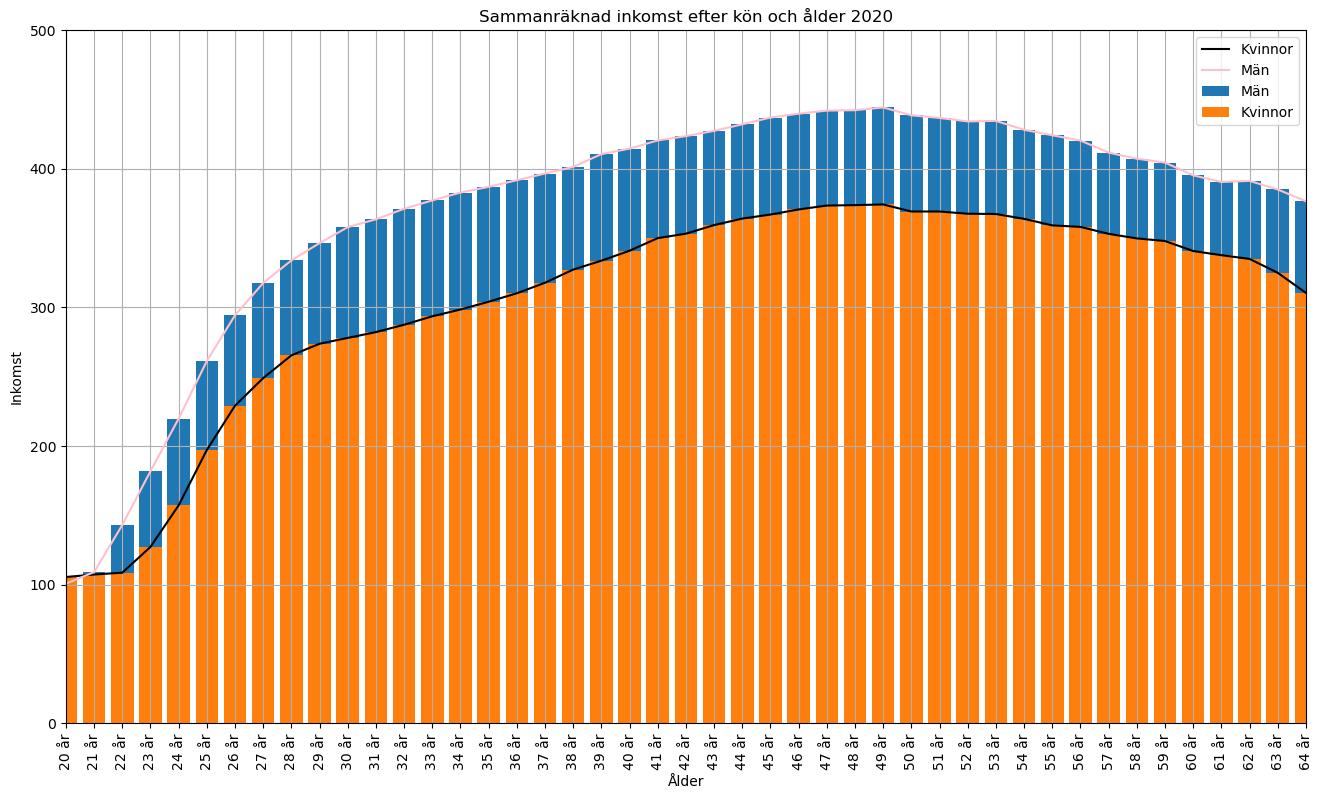

In [20]:
import matplotlib.pyplot as plt


def plot_income_for_gender():
    # Hämta ut alla år från data_list, men vill undvika att hämta dubbelt så
    # tar endast för kolumn med värde män
    years = [data[1] for data in income_list[1:] if data[0] == "män"]
    # Hämtar ut alla inkomster för män och konverterar till float
    income_men = [float(data[2]) for data in income_list[1:] if data[0] == "män"]
    # Hämtar ut alla inkomster för kvinnor och konverterar till float
    income_women = [float(data[2]) for data in income_list[1:] if data[0] == "kvinnor"]

    # Sätt storleken på plotytan
    fig, ax = plt.subplots(figsize=(16, 9))

    plt.plot(years, income_women, color="black", label="Kvinnor")
    plt.plot(years, income_men, color="pink", label="Män")
    plt.bar(years, income_men, label="Män")
    plt.bar(years, income_women, label="Kvinnor")

    plt.title("Sammanräknad inkomst efter kön och ålder 2020")
    plt.xticks(rotation=90)
    plt.xlabel("Ålder")
    plt.ylabel("Inkomst")
    # Här sätter jag startvärden för x- och y-axeln
    plt.xlim([years[0], years[len(years) - 1]])
    plt.ylim([0, 500])
    plt.grid()
    plt.legend()
    plt.show()


plot_income_for_gender()

## Uppgift 3 c)
Ev. kommentar:

In [21]:
# Hjälpfunktion för att hämta minimum inkomst
def _get_min_income(income_list):
    return min(income_list)


# Hjälpmetod för att hämta max-värdet
def _get_max_income(income_list):
    return max(income_list)


# Hjälpmetod för att hämta medelvärdet
def _get_mean_income(income_list):
    return round(sum(income_list) / len(income_list), 2)


# Hjälpmetod för att hämta medianvärdet
def _get_median_income(income_list):
    # Sortera värden i storleksordning
    sorted_list = sorted(income_list)
    # Om listan går att dela med 1 som rest tar vi det mittersta värdet
    if len(sorted_list) % 2 == 1:
        return sorted_list[len(sorted_list) // 2]
    else:
        i = len(sorted_list) // 2
        # Annars returnerar vi medelvärdet av de två mittersta värden
        return (sorted_list[i - 1] + sorted_list[i]) / 2


def print_table_with_income():
    # Hämtar ut alla inkomster för män och konverterar till float
    income_men = [float(data[2]) for data in income_list[1:] if data[0] == "män"]
    # Hämtar ut alla inkomster för kvinnor och konverterar till float
    income_women = [float(data[2]) for data in income_list[1:] if data[0] == "kvinnor"]
    # Här tar vi fram alla beräkande värden
    min_income_men = _get_min_income(income_men)
    min_income_women = _get_min_income(income_women)
    max_income_men = _get_max_income(income_men)
    max_income_women = _get_max_income(income_women)
    mean_income_men = _get_mean_income(income_men)
    mean_income_women = _get_mean_income(income_women)
    median_income_men = _get_median_income(income_men)
    median_income_women = _get_median_income(income_women)

    header1 = "Mininkomst"
    header2 = "Maxinkomst"
    header3 = "Medelinkomst"
    header4 = "Medianinkomst"
    man_string = "Män"
    woman_string = "Kvinnor"
    # Justera headers så de blir korrekt utplacerade
    print(f"{header1:>21}{header2:>14}{header3:>14}{header4:>14}")
    print("---------|-------------|-----------|-------------|----------")
    print(
        f"{man_string:9}|{min_income_men:<13}|{max_income_men:<11}|{mean_income_men:<13}|{median_income_men:<9}"
    )
    print("---------|-------------|-----------|-------------|----------")
    print(
        f"{woman_string:9}|{min_income_women:<13}|{max_income_women:<11}|{mean_income_women:<13}|{median_income_women:<9}"
    )


print_table_with_income()

           Mininkomst    Maxinkomst  Medelinkomst Medianinkomst
---------|-------------|-----------|-------------|----------
Män      |100.7        |444.3      |370.02       |396.6    
---------|-------------|-----------|-------------|----------
Kvinnor  |105.5        |374.3      |305.21       |335.0    


## Uppgift 3 d)
Ev. kommentar:

['Riket', '334756']
['STOCKHOLMS LÄN', '390653']
['Upplands Väsby', '345115']
-----------------|--------------|-----------
Typ              |Namn          |Inkomster 
-----------------|--------------|-----------
Fattigaste       |Högsby        |261734Kr  
-----------------|--------------|-----------
Rikaste          |Danderyd      |628082Kr  
-----------------|--------------|-----------
Medel            |Sverige       |314840Kr  
-----------------|--------------|-----------
Vald kommun      |Borås         |313952Kr  
-----------------|--------------|-----------


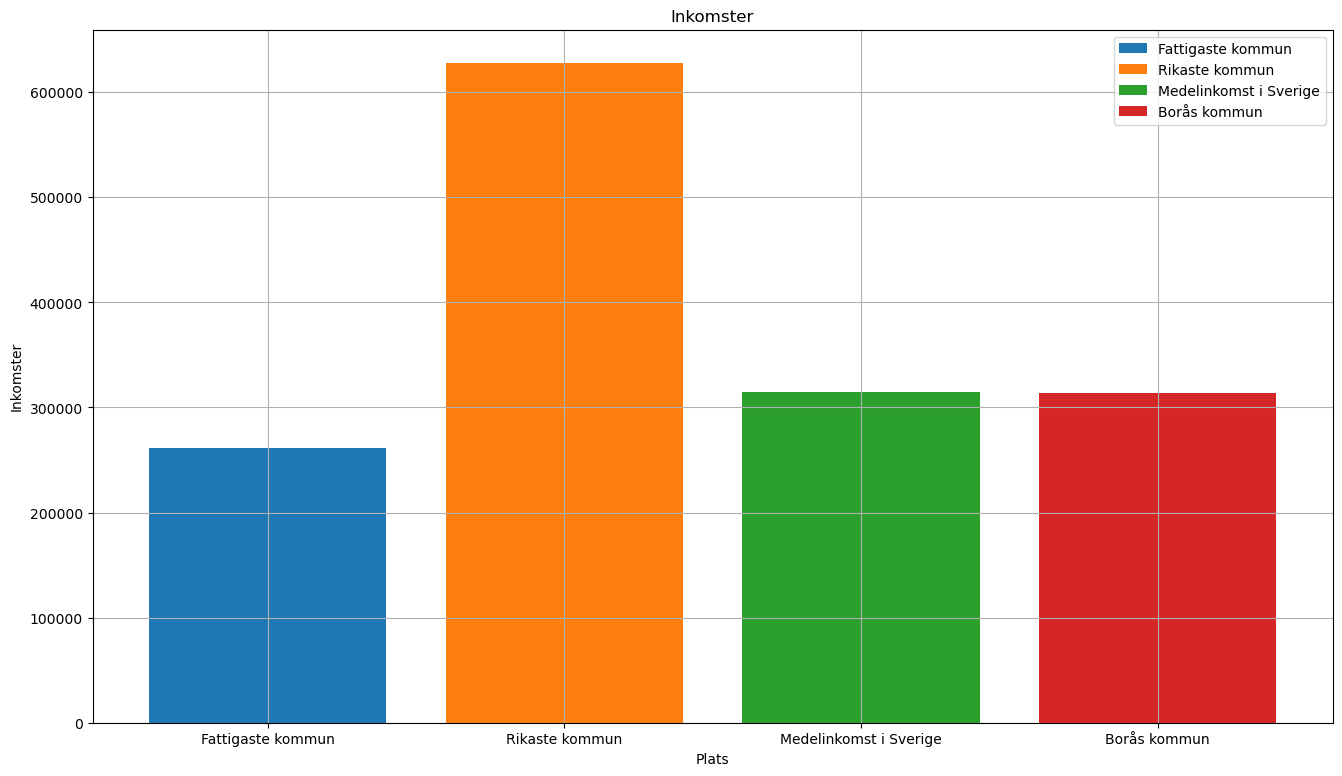

In [22]:
inkomsterKommunerData = read_file("inkomsterKommuner.csv")
# Printa de tre första raderna på var sin rad.
[print(data) for data in inkomsterKommunerData[:3]]

# Hjälpfunktion för att hitta fattigaste kommunen
def _get_poorest_municipality(income_list):
    min_income = 0
    min_income_name = ""
    for income in income_list:
        # Första körning så sätter vi min_income, min_income_name till första värdet
        if min_income == 0:
            min_income = income[1]
            min_income_name = income[0]
        else:
            # Om income är mindre än hittills minsta income används den
            if income[1] < min_income:
                min_income = income[1]
                min_income_name = income[0]
    return min_income, min_income_name


# Hjälpfunktion för att hitta rikaste kommunen
def _get_richest_municipality(income_list):
    max_income = 0
    max_income_name = ""
    for income in income_list:
        # Första körning så sätter vi max_income, max_income_name till första värdet
        if max_income == 0:
            max_income = income[1]
            max_income_name = income[0]
        else:
            # Om income är strörre än hittills största income används den
            if income[1] > max_income:
                max_income = income[1]
                max_income_name = income[0]
    return max_income, max_income_name


# Hjälpmetod för att räkna ut medelvärde
def _get_mean_value_for_sweden(income_list, with_counties=False):

    list_without_riket = [income for income in income_list if "Riket" not in income[0]]
    mean_value = 0
    # Jag la till möjlighet att välja om man ska ta med län eller ej
    if with_counties:
        # Om inte rader med "LÄN" ska tas bort så summerar vi inkomst och delar med
        # listans längd
        mean_value = sum([int(income[1]) for income in list_without_riket]) / len(
            list_without_riket
        )
    else:
        # Här vill vi inte ha med rader med "LÄN"
        list_with_only_municipalities = [
            income for income in list_without_riket if "LÄN" not in income[0]
        ]
        mean_value = sum(
            [int(income[1]) for income in list_with_only_municipalities]
        ) / len(list_with_only_municipalities)
    return round(mean_value)


# Hjälpmetod för att hämta värde för en viss kommun
def _get_value_for_selected(income_list, municipality):
    # Hitta raden med värde `municipality` och konvertera värdet till int och returnera
    # första (och ända) värdet i listan
    return [int(income[1]) for income in income_list if income[0] == municipality][0]


def print_municipality_income(income_list):
    # Vi skippar första raden som har rubriker
    poorest_value, poorest_name = _get_poorest_municipality(income_list)
    richest_value, richest_name = _get_richest_municipality(income_list)
    # Här kan man välja ifall man ska ta med LÄN-värden eller ej. I detta fallet utan.
    mean_value = _get_mean_value_for_sweden(
        income_list=income_list, with_counties=False
    )
    mean_name = "Sverige"
    selected_municipality = "Borås"
    selected_value = _get_value_for_selected(income_list, selected_municipality)
    header1 = "Typ"
    header2 = "Namn"
    header3 = "Inkomster"

    category1 = "Fattigaste"
    category2 = "Rikaste"
    category3 = "Medel"
    category4 = "Vald kommun"

    print("-----------------|--------------|-----------")
    print(f"{header1:<17}|{header2:<14}|{header3:<10}")
    print("-----------------|--------------|-----------")
    # Skriv ut värden, konverterar värden till sträng och konkatenera med 'Kr'
    print(f"{category1:<17}|{poorest_name:<14}|{str(poorest_value) + 'Kr':<10}")
    print("-----------------|--------------|-----------")
    print(f"{category2:<17}|{richest_name:<14}|{str(richest_value) + 'Kr':<10}")
    print("-----------------|--------------|-----------")
    print(f"{category3:<17}|{mean_name:<14}|{str(mean_value) + 'Kr':<10}")
    print("-----------------|--------------|-----------")
    print(
        f"{category4:<17}|{selected_municipality:<14}|{str(selected_value) + 'Kr':<10}"
    )
    print("-----------------|--------------|-----------")

    # Sätt storleken på plotytan
    fig, ax = plt.subplots(figsize=(16, 9))

    plt.bar(
        "Fattigaste kommun",
        int(poorest_value),
        label="Fattigaste kommun",
    )
    plt.bar(
        "Rikaste kommun",
        int(richest_value),
        label="Rikaste kommun",
    )
    plt.bar(
        "Medelinkomst i Sverige",
        int(mean_value),
        label="Medelinkomst i Sverige",
    )
    plt.bar(
        f"{selected_municipality} kommun",
        int(selected_value),
        label=f"{selected_municipality} kommun",
    )
    # plt.bar(years, income_women, label="Kvinnor")

    plt.title("Inkomster")
    plt.xlabel("Plats")
    plt.ylabel("Inkomster")
    plt.grid()
    plt.legend()
    plt.show()


print_municipality_income(inkomsterKommunerData)
